## Univariate Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv('combined.csv')
df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1437396,141,61,2104,583.03,630.53,0,1,13,473,77,TYPE_A,4.5,Fish,Continental
456544,1060716,142,61,2104,581.03,582.03,0,0,42,473,77,TYPE_A,4.5,Fish,Continental
456545,1029231,143,61,2104,583.03,581.03,0,0,40,473,77,TYPE_A,4.5,Fish,Continental
456546,1141147,144,61,2104,582.03,581.03,0,0,53,473,77,TYPE_A,4.5,Fish,Continental


### Check Out Price

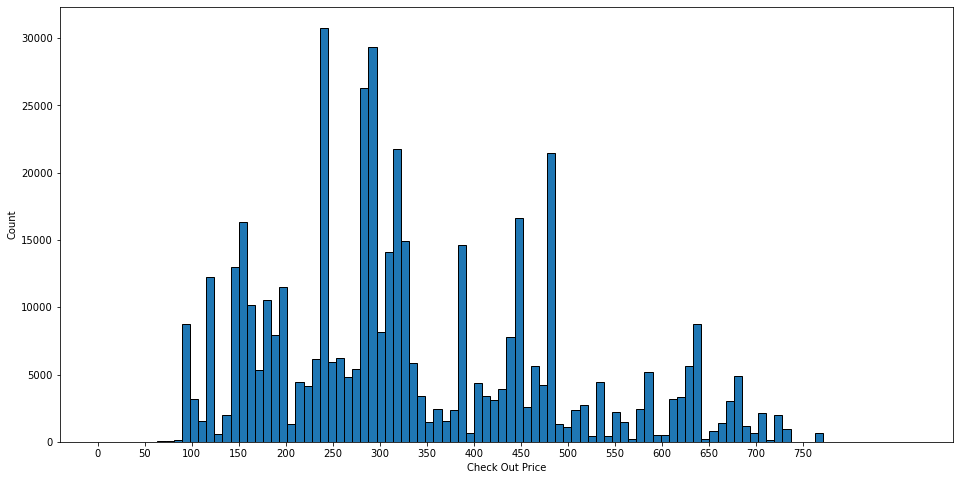

In [3]:
plt.figure(figsize=(16,8))
plt.hist(df['checkout_price'], bins=100, edgecolor='black')
plt.xlabel('Check Out Price')
plt.ylabel('Count')
plt.xticks(np.arange(0,800,step=50))
plt.show()

### Base Price

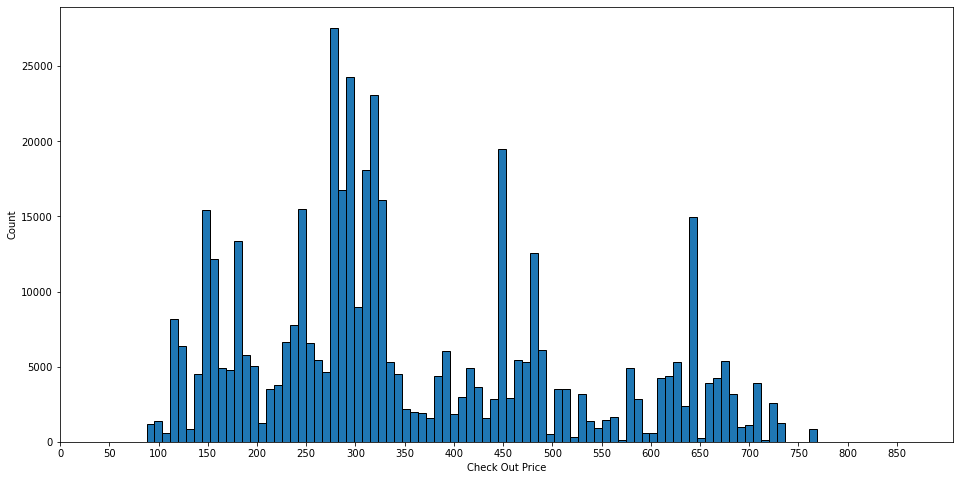

In [4]:
plt.figure(figsize=(16,8))
plt.hist(df['base_price'], bins=100, edgecolor='black')
plt.xlabel('Check Out Price')
plt.ylabel('Count')
plt.xticks(np.arange(0,900, step=50))
plt.show()

### emailer_for_promotion

<AxesSubplot:xlabel='emailer_for_promotion', ylabel='count'>

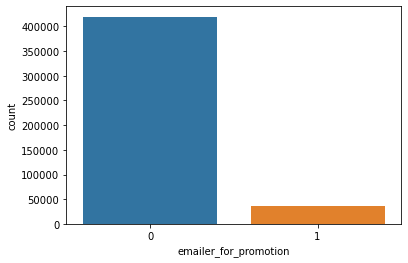

In [5]:
sns.countplot(x='emailer_for_promotion', data=df)

### homepage_featured

<AxesSubplot:xlabel='homepage_featured', ylabel='count'>

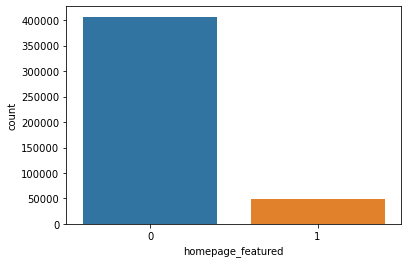

In [6]:
sns.countplot(x='homepage_featured', data=df)

### Area of operation

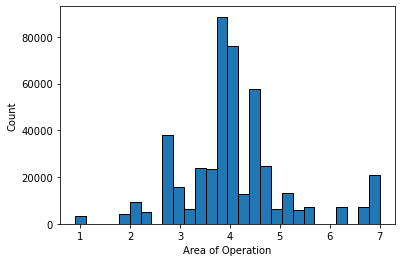

In [7]:
plt.hist(df['op_area'], bins=28, edgecolor='black')
plt.xlabel('Area of Operation')
plt.ylabel('Count')
plt.show()

### Category

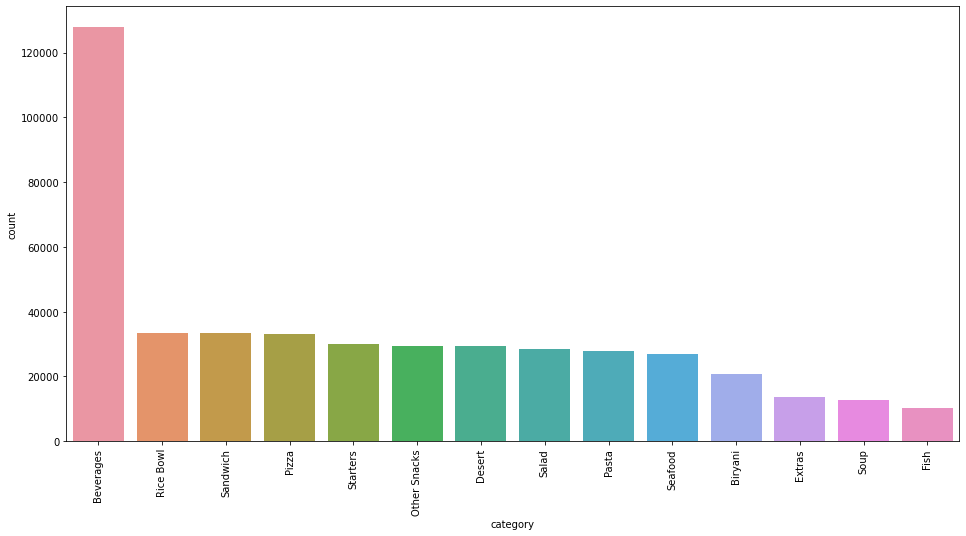

In [8]:
plt.figure(figsize=(16, 8))
sns.countplot(x='category', data=df, order=df['category'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

### Cuisine

<AxesSubplot:xlabel='cuisine', ylabel='count'>

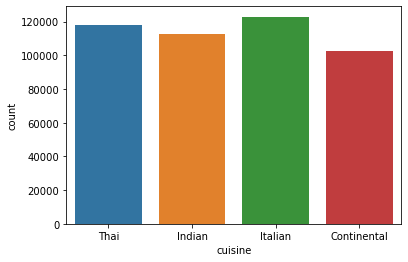

In [9]:
sns.countplot(x='cuisine', data=df)

## Bivariate Analysis

### Number of orders VS emailer_for_promotion

<AxesSubplot:xlabel='emailer_for_promotion', ylabel='num_orders'>

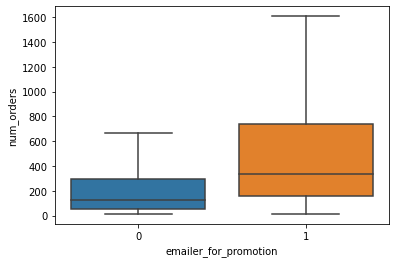

In [10]:
sns.boxplot(x='emailer_for_promotion', y='num_orders', data=df,showfliers=False)

In [11]:
no_emailer = df['num_orders'][df['emailer_for_promotion']== 0]
sent_emailer = df['num_orders'][df['emailer_for_promotion']== 1]
stats.mannwhitneyu(no_emailer, sent_emailer)

MannwhitneyuResult(statistic=4291410707.5, pvalue=0.0)

- The p-value is very low
- Probability that this difference is due to random chance is very very low
- The difference is significant
- Emailer promotions does affect number of orders

### Number of orders VS homepage_featured

<AxesSubplot:xlabel='homepage_featured', ylabel='num_orders'>

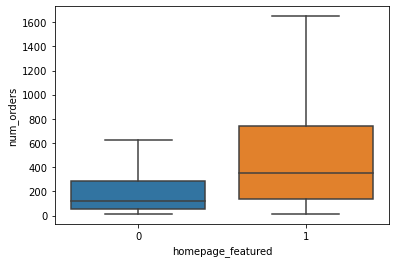

In [16]:
sns.boxplot(x='homepage_featured', y='num_orders', data=df, showfliers=False)

In [17]:
not_featured = df['num_orders'][df['homepage_featured']== 0]
featured = df['num_orders'][df['homepage_featured']== 1]
stats.mannwhitneyu(not_featured, featured)

MannwhitneyuResult(statistic=5768867174.0, pvalue=0.0)

- p-value is very very low
- probability that the difference is due to random chance is very low
- featuring on home page does affect number of orders

### Number of orders VS Category

In [12]:
df_category = df[['category', 'num_orders']]
df_category

,category,num_orders
0,Beverages,177
1,Beverages,323
2,Beverages,96
3,Beverages,163
4,Beverages,215
...,...,...
456543,Fish,13
456544,Fish,42
456545,Fish,40
456546,Fish,53


In [13]:
df_category_pivot = df_category.pivot(columns = 'category', values = 'num_orders')
df_category_pivot

category,Beverages,Biryani,Desert,Extras,Fish,Other Snacks,Pasta,Pizza,Rice Bowl,Salad,Sandwich,Seafood,Soup,Starters
0,177.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,323.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,96.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,163.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,215.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
456544,NaN,NaN,NaN,NaN,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
456545,NaN,NaN,NaN,NaN,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
456546,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
index_sort = df_category_pivot.mean().sort_values().index
df_category_sorted = df_category_pivot[index_sort]

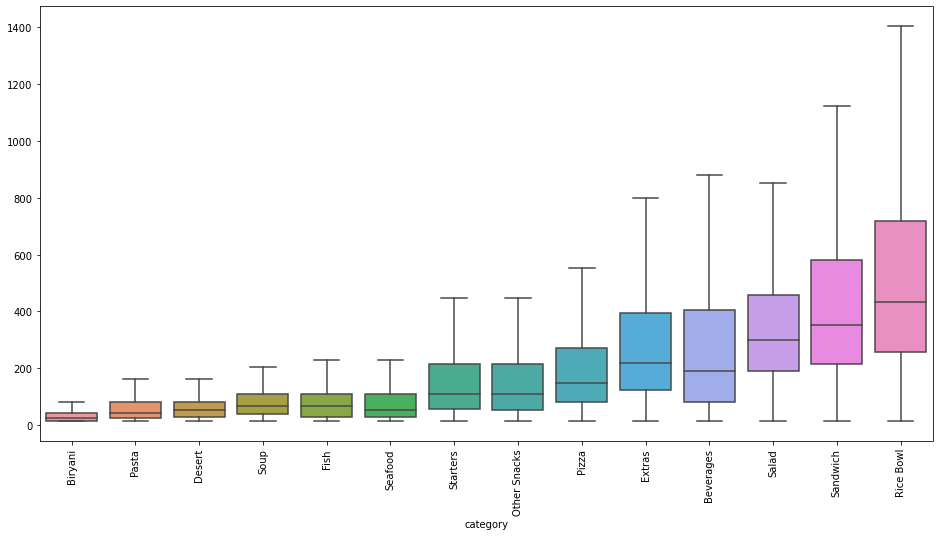

In [15]:
plt.figure(figsize=(16,8))
sns.boxplot(data=df_category_sorted, showfliers=False)
plt.xticks(rotation=90)
plt.show()

### Number of orders VS Cuisine

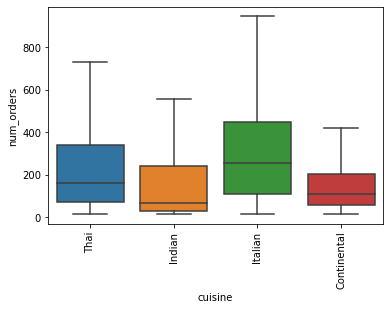

In [18]:
sns.boxplot(x='cuisine', y ='num_orders', data=df, showfliers=False)
plt.xticks(rotation=90)
plt.show()

### Which center prepared the most orders? 

In [19]:
orders_center = df[['center_id','num_orders']].groupby(df['center_id']).agg({'num_orders':'sum'}).sort_values('num_orders', ascending=False)
orders_center

,num_orders
center_id,
13,4296545
43,3920294
10,3381018
52,3125835
137,3117478
...,...
74,691044
162,680255
149,637527


In [20]:
orders_center.index

Int64Index([ 13,  43,  10,  52, 137,  67,  11, 174, 104,  27, 108,  51,  99,
            132,  24,  36,  89,  59, 146,  65, 126,  97,  30,  75,  80,  86,
             66, 109,  83,  23,  72, 153, 124, 101, 145, 110,  50, 157, 106,
             20, 113,  32, 152,  17,  61,  39,  14,  34,  76,  93,  53,  68,
             81, 129,  29, 143,  73,  42,  88, 177,  58,  64,  94, 102,  92,
             26, 186,  77,  55, 161,  57, 139,  74, 162, 149,  41,  91],
           dtype='int64', name='center_id')

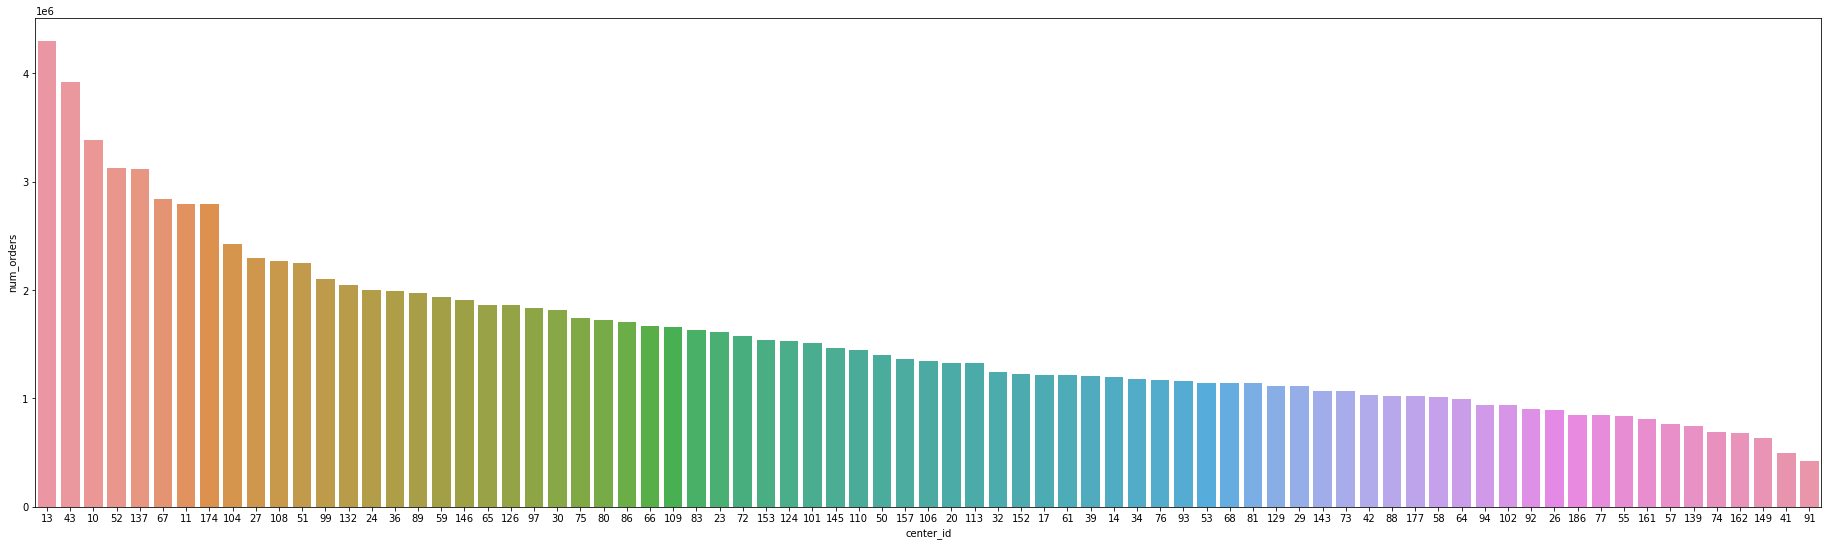

In [21]:
plt.figure(figsize=(32,9))
sns.barplot(x=orders_center.index, y=orders_center['num_orders'], order = orders_center.index)
plt.show()

### Which were the peak periods for food orders?

In [22]:
orders_week = df[['week','num_orders']].groupby(df['week']).agg({'num_orders':'sum'}).sort_values('num_orders', ascending=False)
orders_week

,num_orders
week,
48,1303457
5,1198675
60,1131459
53,1108236
100,1088162
...,...
35,630458
29,625414
16,611515


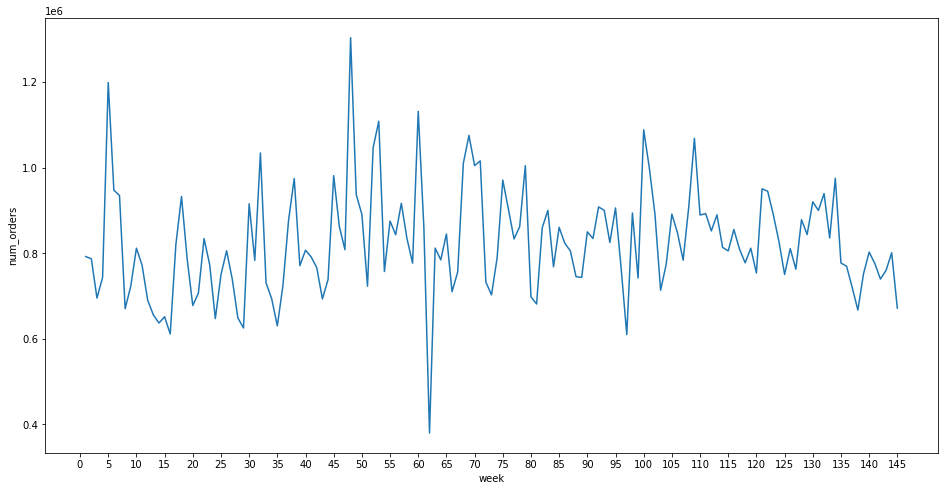

In [23]:
plt.figure(figsize=(16,8))
sns.lineplot(x=orders_week.index, y=orders_week['num_orders'])
plt.xticks(np.arange(0, 150, step=5))
plt.show()

### Do different centers have very different peak periods?

In [24]:
orders_center.median()

num_orders    1349175.0
dtype: float64

In [25]:
orders_center[orders_center['num_orders']==1349175.0]

,num_orders
center_id,
106,1349175


In [26]:
orders_13 = df[df['center_id']==13]
orders_13_byweek = orders_13[['week', 'num_orders']].groupby(df['week']).agg({'num_orders':'sum'})
orders_13_byweek

,num_orders
week,
1,29531
2,26903
3,26938
4,28707
5,38183
...,...
141,29105
142,27163
143,28058


In [27]:
orders_91 = df[df['center_id']==91]
orders_91_byweek = orders_91[['week', 'num_orders']].groupby(df['week']).agg({'num_orders':'sum'})
orders_91_byweek

,num_orders
week,
1,3451
2,2707
3,1523
4,2507
5,3464
...,...
141,2340
142,2841
143,3074


In [28]:
orders_106 = df[df['center_id']==106]
orders_106_byweek = orders_106[['week', 'num_orders']].groupby(df['week']).agg({'num_orders':'sum'})
orders_106_byweek

,num_orders
week,
1,8420
2,9301
3,7824
4,7732
5,12414
...,...
141,7674
142,7670
143,7649


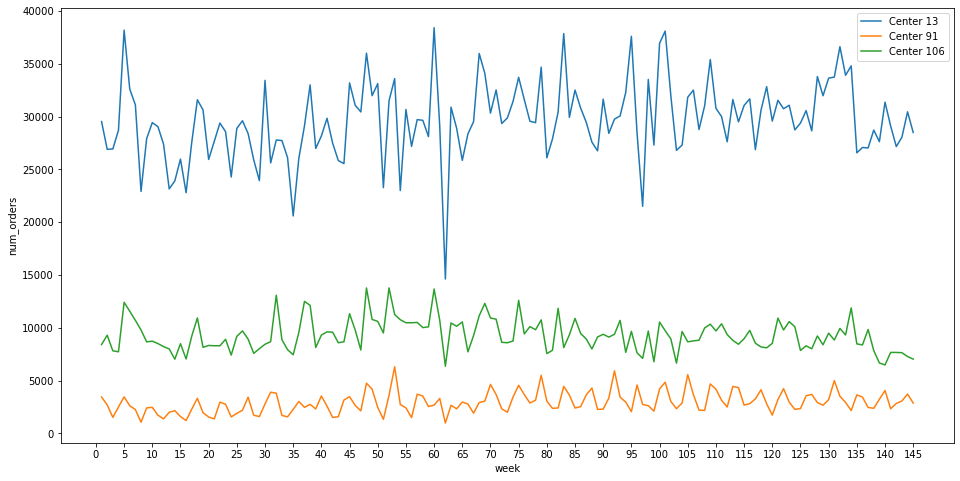

In [29]:
plt.figure(figsize=(16,8))
sns.lineplot(x=orders_13_byweek.index, y=orders_13_byweek['num_orders'], label = 'Center 13')
sns.lineplot(x=orders_91_byweek.index, y=orders_91_byweek['num_orders'], label = 'Center 91')
sns.lineplot(x=orders_106_byweek.index, y=orders_106_byweek['num_orders'], label = 'Center 106')
plt.xticks(np.arange(0, 150, step=5))
plt.show()